In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate V = I w + b + noise."""
    I = torch.zeros(size=(num_examples, len(w))).normal_()
    V = torch.matmul(I, w) + b
    V += torch.zeros(size=V.shape).normal_(std=0.01)
    return I, V

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5667, 1.3245]) 
label: tensor(0.8329)


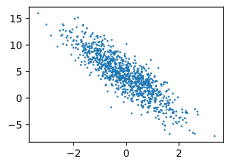

In [4]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [6]:
batch_size = 10

for I, V in data_iter(batch_size, features, labels):
    print(I, '\n', V)
    break

tensor([[-0.6160, -1.9153],
        [ 0.5689,  0.9284],
        [-1.0739, -0.5899],
        [-0.5926,  0.8560],
        [-0.1308,  0.3901],
        [ 0.1363, -1.1442],
        [-1.7088,  1.2054],
        [-0.5913,  1.5270],
        [-0.0387, -0.2474],
        [ 0.4179, -0.4169]]) 
 tensor([ 9.4821,  2.1891,  4.0561,  0.1242,  2.6256,  8.3629, -3.3256, -2.1677,
         4.9646,  6.4479])


In [7]:
def linreg(I, w, b):  #@save
    return torch.matmul(I, w) + b

In [8]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
def squared_loss(y_hat, y):  #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):  #@save
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [12]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for I, V in data_iter(batch_size, features, labels):
        l = loss(net(I, w, b), V)  # Minibatch loss in X and y
        l.sum().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean())}')

epoch 1, loss 0.03314287215471268
epoch 2, loss 0.00012758038064930588
epoch 3, loss 5.1383321988396347e-05


In [13]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([0.0003, 0.0003], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.0003], grad_fn=<RsubBackward1>)
